In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
df.duplicated().sum()

0

In [13]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [14]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [15]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [19]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)   #drop first it helps in reducing the extra column created during dummy variable creation. see gender

In [20]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [21]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [22]:
X = df.drop(columns=['Exited'])
y = df['Exited']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=1)

In [23]:
# Now scale the values

# Normalizing the values with mean as 0 and Standard Deviation as 1

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [24]:
def visualization(x, y, xlabel):
    plt.figure(figsize=(10,5))
    plt.hist([x, y], color=['red', 'green'], label = ['exit', 'not_exit'])
    plt.xlabel(xlabel,fontsize=20)
    plt.ylabel("No. of customers", fontsize=20)
    plt.legend()

In [25]:
df_churn_exited = df[df['Exited']==1]['Tenure']     #customer left the bank
df_churn_not_exited = df[df['Exited']==0]['Tenure']  #customer not left the bank

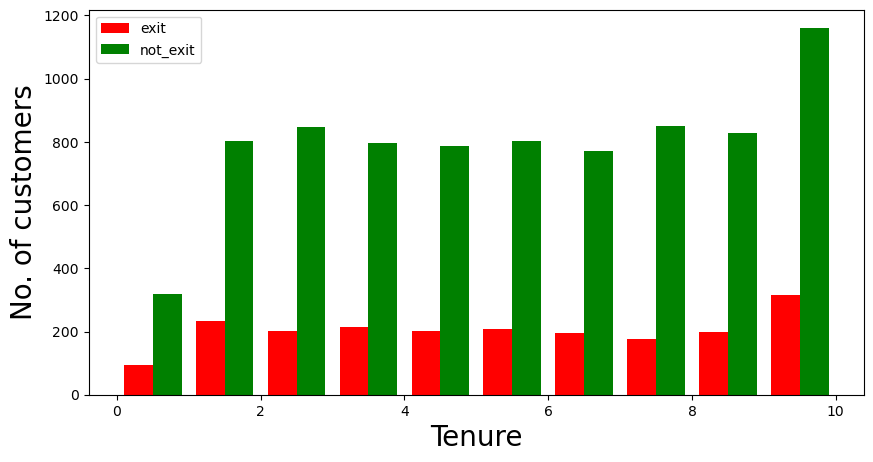

In [26]:
visualization(df_churn_exited, df_churn_not_exited, "Tenure")

In [27]:
df_churn_exited2 = df[df['Exited']==1]['Age']
df_churn_not_exited2 = df[df['Exited']==0]['Age']

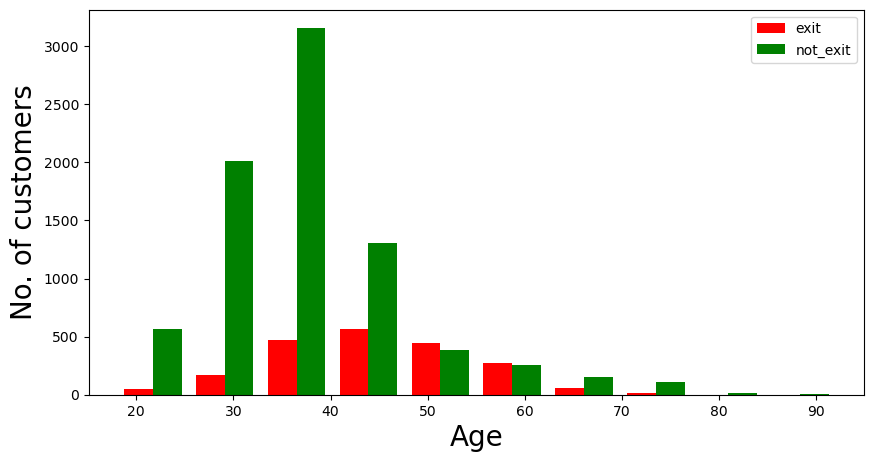

In [28]:
visualization(df_churn_exited2, df_churn_not_exited2, "Age")

In [29]:
import keras

In [30]:
from keras.models import Sequential #To create sequential neural network layers in a sequential order
from keras.layers import Dense #To create hidden layers

In [31]:
classifier = Sequential() 

classifier.add(Dense(units =3 , activation='sigmoid', kernel_initializer='uniform', input_dim = 11))   #input layer 11 hidden layer=3 #uniform is type of distribution

classifier.add(Dense(units =1 , activation='sigmoid', kernel_initializer='uniform',))  # output layer is 1

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 3)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 40 (160.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output
classifier.fit(X_train_scaled,y_train,batch_size = 10,epochs=10, validation_split=0.2 )

Epoch 1/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7982 - loss: 0.6160 - val_accuracy: 0.7993 - val_loss: 0.4865
Epoch 2/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8094 - loss: 0.4630 - val_accuracy: 0.7993 - val_loss: 0.4580
Epoch 3/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8011 - loss: 0.4510 - val_accuracy: 0.7993 - val_loss: 0.4482
Epoch 4/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7976 - loss: 0.4400 - val_accuracy: 0.7993 - val_loss: 0.4422
Epoch 5/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8018 - loss: 0.4317 - val_accuracy: 0.7993 - val_loss: 0.4382
Epoch 6/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8058 - loss: 0.4218 - val_accuracy: 0.7993 - val_loss: 0.4353
Epoch 7/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8034 - loss: 0.4195 - val_accuracy: 0.7993 - val_loss: 0.4334
Epoch 8/10
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8033 - loss: 0.4182 - val_accuracy: 0

In [34]:
classifier.layers[0].get_weights()

[array([[ 0.07337436,  0.0690624 ,  0.06960513],
        [-1.7967796 , -1.696421  , -1.5668837 ],
        [ 0.00417999,  0.00675887,  0.02646822],
        [-0.3229417 , -0.3527829 , -0.36440563],
        [ 0.06598399,  0.08124969,  0.08082076],
        [ 0.07422699,  0.05801059,  0.10294197],
        [ 0.70245844,  0.7387252 ,  0.80630964],
        [-0.05232808, -0.08904765, -0.09745185],
        [-0.56371725, -0.5650305 , -0.5845312 ],
        [-0.02144291, -0.02173957, -0.0063641 ],
        [ 0.50944066,  0.56291556,  0.5432002 ]], dtype=float32),
 array([0.331174  , 0.3125166 , 0.33306822], dtype=float32)]

In [35]:
classifier.layers[1].get_weights()

[array([[-1.027551  ],
        [-0.95418525],
        [-0.99964565]], dtype=float32),
 array([-0.02655004], dtype=float32)]

In [36]:
classifier.predict(X_test_scaled)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


array([[0.09658866],
       [0.10686525],
       [0.12414934],
       ...,
       [0.06364952],
       [0.11196763],
       [0.09932186]], dtype=float32)

In [37]:
y_log= classifier.predict(X_test_scaled)  # y_log is just name of varriable

y_pred= np.where(y_log>0.5,1,0)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.791

In [39]:
from keras.metrics import Accuracy
# now check accuracy
classifier.compile(loss='binary_crossentropy',optimizer = 'Adam', metrics=['Accuracy'])  # Adam perform good for our gradient decent algorithm

history = classifier.fit(X_train_scaled,y_train,batch_size = 10,epochs=50, validation_split=0.2 ) 

Epoch 1/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - Accuracy: 0.7977 - loss: 0.4263 - val_Accuracy: 0.7993 - val_loss: 0.4304
Epoch 2/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - Accuracy: 0.8063 - loss: 0.4245 - val_Accuracy: 0.8029 - val_loss: 0.4299
Epoch 3/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Accuracy: 0.7916 - loss: 0.4323 - val_Accuracy: 0.8014 - val_loss: 0.4296
Epoch 4/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.7904 - loss: 0.4351 - val_Accuracy: 0.7993 - val_loss: 0.4297
Epoch 5/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.8042 - loss: 0.4151 - val_Accuracy: 0.8014 - val_loss: 0.4289
Epoch 6/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Accuracy: 0.7983 - loss: 0.4276 - val_Accuracy: 0.8029 - val_loss: 0.4286
Epoch 7/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Accuracy: 0.7996 - loss: 0.4337 - val_Accuracy: 0.8036 - val_loss: 0.4283
Epoch 8/50
560/560 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Accuracy: 0.8001 - loss: 0.4402 - val_Accuracy: 0.

In [40]:
classifier.layers[0].get_weights()

[array([[ 0.1791609 ,  0.23147419, -0.16750836],
        [-3.999854  , -2.7895894 , -0.00931735],
        [-0.02654306, -0.07250505,  0.11368638],
        [ 0.24091615, -0.717719  , -0.45677677],
        [-0.1254799 ,  0.02385339,  0.31536287],
        [-0.05633831,  0.2482219 , -0.05486684],
        [-0.92095596, -0.40532988,  2.4070942 ],
        [ 0.17973089, -0.26946855, -0.09968162],
        [-0.22856033, -0.5551003 , -0.91645074],
        [-0.2569901 ,  0.18978027, -0.12466101],
        [-0.12041532,  0.73640275,  0.8337186 ]], dtype=float32),
 array([0.71917033, 0.09944043, 0.27307755], dtype=float32)]

In [41]:
classifier.layers[1].get_weights()

[array([[-1.6153756],
        [-1.1788732],
        [-2.059697 ]], dtype=float32),
 array([0.96202207], dtype=float32)]

In [42]:
y_log= classifier.predict(X_test_scaled)  # y_log is just name of varriable

y_pred= np.where(y_log>0.5,1,0)

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8323333333333334

In [44]:
acc=history.history['loss']
val_acc=history.history['Accuracy']
loss=history.history['val_loss']
val_loss=history.history['val_Accuracy']
# so history dictionary created

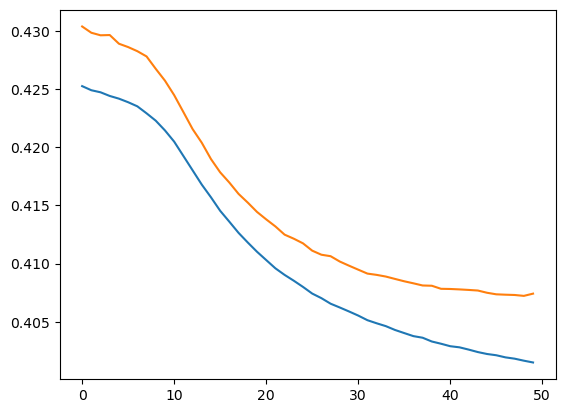

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

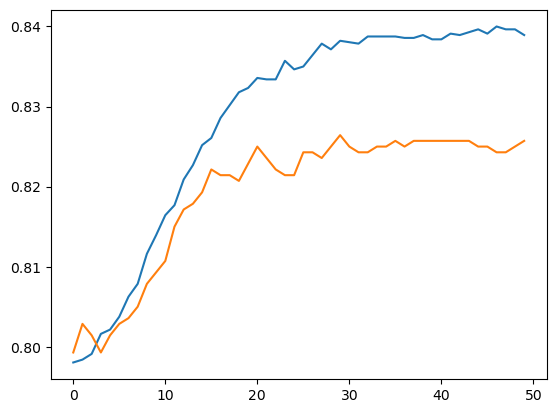

In [46]:
plt.plot(history.history['Accuracy'])

plt.plot(history.history['val_Accuracy'])

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test,y_pred)
cm

array([[2299,   74],
       [ 429,  198]], dtype=int64)

In [48]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8323333333333334

Text(95.72222222222221, 0.5, 'Truth')

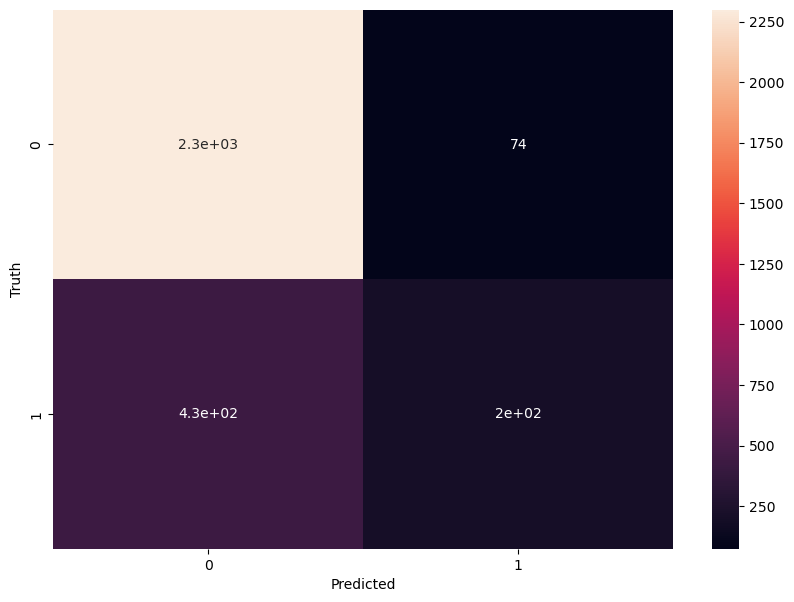

In [49]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2373
           1       0.73      0.32      0.44       627

    accuracy                           0.83      3000
   macro avg       0.79      0.64      0.67      3000
weighted avg       0.82      0.83      0.81      3000

